# Notes On K Nearest Neighbor(KNN)

###### What is kNN?

kNN is a supervised machine-learing algorithm that can be used for both classification and regression problems. It is best defined by the two following properties:

1. Lazy learning algorithm : lazy learning means it does require any training data points for model generation.

2. Non-parametric learning algorithm : Non-parametric learning algorithm means it does not make any assumption about the underlying data.

###### How does kNN work?

kNN uses the similarity of features to predict the values of new data-points. The new prediction will be assigned a value based on how it matches or how close it is to existing points in the training set. k represents number of nearest neighbors.

To find the closest similar points, you calculate the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

In [15]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [16]:
#Importing Data
sma_data = pd.read_csv('Social_Network_Ads.csv')
sma_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [17]:
#Check for missing values
sma_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [18]:
#Get the number of rows and columns
sma_data.shape

(400, 5)

In [19]:
#Create X matrix of features & y target vector
X = sma_data.iloc[:, [2,3]]
y = sma_data.iloc[:, 4]

In [20]:
#Confirm That X is a matrix and y is a vector 
print('X-matrix :', X.shape)
print('y-vector :', y.shape)

X-matrix : (400, 2)
y-vector : (400,)


In [21]:
#Splitting Dataset Into Training & Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                   )

In [22]:
#Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Fitting KNN to training set
kNN_classifier = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski', p=2)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
#Make Predictions
y_pred = kNN_classifier.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred) * 100)

Model Accuracy: 89.16666666666667


In [26]:
cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

Confusion Matrix:
[[72  7]
 [ 6 35]]


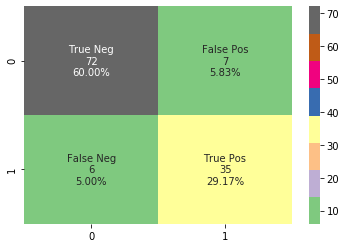

In [27]:
#Visualize The Confusion Matrix Using a heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot= labels, fmt='', cmap='Accent')

###### Understanding Confusion Matrix
True Negative:

Interpretation: We predicted negative and it is true (60%).

False Positive: (Type 1 Error)

Interpretation: We predicted positive and it’s false (5.83% error).

False Negative: (Type 2 Error)

Interpretation: We predicted negative and it’s false (5.00% error).

True Positive:

Interpretation: You predicted positive and it’s true (29.17%).

In [29]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        79
           1       0.83      0.85      0.84        41

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120

